In [2]:
import pathlib
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from ALLCools.plot.color import *

In [3]:
from matplotlib import rc

labelsize = 6
linewidth = 0.6
rc('lines', linewidth=linewidth)
rc('axes', labelsize=labelsize, linewidth=linewidth)
rc('xtick', labelsize=labelsize)
rc('ytick', labelsize=labelsize)
rc('xtick.major', width=linewidth)
rc('ytick.major', width=linewidth)
rc('xtick.minor', width=linewidth-0.2)
rc('ytick.minor', width=linewidth-0.2)
rc('patch', linewidth=linewidth)

In [4]:
total_cfm = pd.concat([
    pd.read_csv(path, index_col=0)
    for path in list(pathlib.Path().glob('*csv'))
],
                      sort=False).fillna(0)

In [5]:
mc_order = [
    'IT-L23 Cux1', 'IT-L23 Ptprt', 'IT-L23 Tenm2', 'IT-L23 Foxp1',
    'IT-L4 Astn2', 'IT-L4 Shc3', 'IT-L5 Cdh8', 'IT-L5 Etv1', 'IT-L5 Grik3',
    'IT-L6 Man1c1', 'IT-L6 Oxr1', 'IT-L6 Cadps2', 'IT-L6 Fstl4', 'CLA Bcl11a',
    'CLA Cdh8', 'CLA Nrp2', 'EP Rgs8', 'EP Tspan5', 'EP Adcy8', 'OLF-Exc Cux2',
    'OLF-Exc Sgcd', 'OLF-Exc Pld5', 'OLF-Exc Lrrtm3', 'OLF-Exc Unc13c',
    'OLF-Exc Cdh9', 'OLF-Exc Bmpr1b', 'OLF-Exc Rmst', 'PT-L5 Abca12',
    'PT-L5 Unc5b', 'PT-L5 Nectin1', 'PT-L5 Tmtc2', 'PT-L5 Plcb4',
    'PT-L5 Ptprt', 'PT-L5 Tenm2', 'PT-L5 Astn2', 'PT-L5 Kcnh1', 'CT-L6 Hcrtr2',
    'CT-L6 Map4', 'CT-L6 Il1rap', 'CT-L6 Megf9', 'L6b Pkhd1', 'L6b Adcy8',
    'L6b Kcnk2', 'L6b Nrp2', 'NP-L6 Cntnap4', 'NP-L6 Kcnab1', 'NP-L6 Boc',
    'NP-L6 Cntnap5a', 'NP-L6 Cyp7b1', 'NP-L6 Olfml2b', 'CA1 Chrm3',
    'CA1 Lingo2', 'CA1 Ptprg', 'CA1 Ak5', 'CA1 Kif26a', 'Gfra1 Gfra1',
    'CA3 Cadm2', 'CA3-St18 Epha5', 'CA3-St18 Nuak1', 'CA3-St18 Tead1',
    'CA3 Efnb2', 'DG dg-all', 'DG-po Kctd8', 'DG-po Calb2', 'IG-CA2 Xpr1',
    'DG-po Bcl11a', 'IG-CA2 Chrm3', 'IG-CA2 Peak1', 'MGE-Pvalb Cnih3',
    'MGE-Pvalb Ptprk', 'MGE-Pvalb Cacna1i', 'MGE-Pvalb Sema5a',
    'MGE-Pvalb Thsd7a', 'MGE-Pvalb Entpd3', 'MGE-Pvalb Gfra2', 'MGE-Sst Ptpre',
    'MGE-Sst Rxra', 'MGE-Sst Unc5b', 'MGE-Sst Chodl', 'PAL-Inh Rarb',
    'MGE-Sst Dock4', 'MGE-Sst Bmper', 'MGE-Sst Etv1', 'MGE-Sst Frmd6',
    'MGE-Sst Rerg', 'MGE-Sst Kcnip4', 'MGE-Sst Ubtd1', 'Chd7 Kcnc2',
    'Chd7 Megf11', 'Chd7 Trpc7', 'CGE-Lamp5 Dock5', 'CGE-Lamp5 Grk5',
    'CGE-Lamp5 Grid1', 'CGE-Lamp5 Nrxn3', 'CGE-Lamp5 Sorcs1', 'CGE-Vip Ntng1',
    'CGE-Vip Ptprm', 'CGE-Vip Robo1', 'CGE-Vip Ccser1', 'CGE-Vip Clstn2',
    'CGE-Vip Fstl4', 'CGE-Vip Galnt17', 'CGE-Vip Grm8', 'Unc5c Unc5c',
    'MSN-D1 Hrh1', 'MSN-D1 Plxnc1', 'MSN-D1 Ntn1', 'MSN-D1 Khdrbs3',
    'MSN-D2 Nrp2', 'MSN-D2 Slc24a2', 'MSN-D2 Casz1', 'MSN-D2 Col14a1',
    'D1L-Fstl4 Cadm1', 'D1L-Fstl4 Crim1', 'D1L-Fstl4 Grm3', 'D1L-Fstl4 Trps1',
    'D1L-PAL Flrt2', 'D1L-PAL Plcxd3', 'D1L-Fstl4 Sipa1l2', 'PAL-Inh Chat',
    'PAL-Inh Ptprd', 'PAL-Inh Igdcc3', 'PAL-Inh Tmem178', 'LSX-Inh Cacna1i',
    'LSX-Inh Dock10', 'LSX-Inh Enox1', 'LSX-Inh Foxp2', 'LSX-Inh Nxph1',
    'LSX-Inh Zeb2', 'LSX-Inh Lats2', 'PAL-Inh Meis1', 'PAL-Inh Meis2',
    'PAL-Inh Onecut2', 'PAL-Inh Tcf7l2', 'PAL-Inh Deptor', 'OLF Mapk10',
    'OLF Pag1', 'OLF Gabbr2', 'OLF Xkr6', 'OLF Kcnd3', 'OLF Trpc4',
    'Foxp2 Homer2', 'Foxp2 Inpp4b', 'Foxp2 Trpc7', 'Foxp2 Dchs2', 'ANP anp-dg',
    'ANP anp-olf-cnu', 'ASC str-hpf', 'ASC cortex-olf', 'ASC mid', 'EC Abhd2',
    'EC Sema3g', 'ODC odc-small', 'ODC odc-large', 'OPC opc-large',
    'OPC opc-small', 'MGC mgc-all', 'PC pc-all', 'VLMC Col4a1', 'VLMC Mapk4',
    'VLMC-Pia vlmc-pia-all'
]
atac_order = [
    'Glutamate.L23.L23c1', 'Glutamate.L23.L23c3', 'Glutamate.L23.L23c2',
    'Glutamate.L4.L4c1', 'Glutamate.L4.L4c2', 'Glutamate.L5.L5c1',
    'Glutamate.L5.L5c3', 'Glutamate.L6.L6c1', 'Glutamate.L5.L5c2',
    'Glutamate.L6.L6c6', 'Glutamate.L6.L6c2', 'Glutamate.L6.L6c5',
    'Glutamate.L6.L6c3', 'Glutamate.L6.L6c4', 'Glutamate.CLA.CLA1',
    'Glutamate.CLA.CLA2', 'Glutamate.CLA.CLA3', 'Glutamate.EP.EP1',
    'Glutamate.AON.AON3', 'Glutamate.OLF.OLF1', 'Glutamate.OLF.OLF3',
    'Glutamate.OLF.OLF4', 'Glutamate.AON.AON1', 'Glutamate.AON.ANO2',
    'Glutamate.AON.AON4', 'Glutamate.OLF.OLF2', 'Glutamate.AON.AON5',
    'Glutamate.OLF.OLF5', 'Glutamate.OLF.OLF6', 'Glutamate.OLF.OLF7',
    'Glutamate.PT.PT8', 'Glutamate.PT.PT5', 'Glutamate.PT.PT3',
    'Glutamate.PT.PT4', 'Glutamate.PT.PT7', 'Glutamate.PT.PT6',
    'Glutamate.PT.PT1', 'Glutamate.PT.PT2', 'Glutamate.CT.CT4',
    'Glutamate.CT.CT5', 'Glutamate.CT.CT1', 'Glutamate.CT.CT2',
    'Glutamate.CT.CT3', 'Glutamate.CT.CT6', 'Glutamate.L6b.L6bc1',
    'Glutamate.L6b.L6bc2', 'Glutamate.L6b.L6bc3', 'Glutamate.L6b.L6bc4',
    'Glutamate.L6b.L6bc5', 'Glutamate.L6b.L6bc6', 'Glutamate.NP.NP2',
    'Glutamate.NP.NP4', 'Glutamate.NP.NP5', 'Glutamate.NP.NP3',
    'Glutamate.NP.NP1', 'Glutamate.CA1.CA1c1', 'Glutamate.L2HIP.L2HIPc1',
    'Glutamate.L2HIP.L2HIPc2', 'Glutamate.L2HIP.L2HIPc3',
    'Glutamate.CA1.CA1c2', 'Glutamate.CA3.CA2c4', 'Glutamate.CA1.CA1c3',
    'Glutamate.CA3.CA2c1', 'Glutamate.CA3.CA2c2', 'Glutamate.GC.DG',
    'Glutamate.CA3.CA2c6', 'Glutamate.CA3.CA2c5', 'Glutamate.CA3.CA2c3',
    'GABA.Pv.Pv6', 'GABA.Pv.Pv1', 'GABA.Pv.Pv5', 'GABA.Pv.Pv3', 'GABA.Pv.Pv2',
    'GABA.Pv.Pv4', 'GABA.Sst.Sst8', 'GABA.Sst.Sst10', 'GABA.Ms.Ms12',
    'GABA.Sst.Sst1', 'GABA.Sst.Sst6', 'GABA.Sst.Sst9', 'GABA.Sst.Sst2',
    'GABA.Sst.Sst3', 'GABA.Sst.Sst5', 'GABA.Sst.Sst4', 'GABA.Sst.Sst7',
    'GABA.Pv.Pv7', 'GABA.Ms.Ms11', 'GABA.Lamp5.Lamp5Iso1',
    'GABA.Lamp5.Lamp5Iso2', 'GABA.Lamp5.Lamp5Iso3', 'GABA.Vip.Vip2',
    'GABA.Vip.Vip1', 'GABA.Vip.Vip3', 'GABA.Vip.Vip4', 'GABA.Lamp5.Lamp5HPF',
    'GABA.MsnD2.D2Msn1', 'GABA.MsnD2.D2Msn4', 'GABA.MsnD1.D1Msn5',
    'GABA.MsnD1.D1Msn2', 'GABA.MsnD1.D1Msn1', 'GABA.MsnD2.D2Msn2',
    'GABA.MsnD2.D2Msn3', 'GABA.Foxp2.Foxp2OLF2', 'GABA.MsnD1.D1Msn3',
    'GABA.MsnD1.D1Msn4', 'GABA.Mxd.Mxd1', 'GABA.Foxp2.Foxp2OLF1',
    'GABA.Ms.Ms10', 'GABA.Ms.Ms3', 'GABA.Ms.Ms4', 'GABA.Ms.Ms5', 'GABA.Ms.Ms8',
    'GABA.Ms.Ms13', 'GABA.Lsx.Lsx1', 'GABA.Lsx.Lsx2', 'GABA.Lsx.Lsx3',
    'GABA.Lsx.Lsx4', 'GABA.Lsx.Lsx5', 'GABA.Lsx.Lsx6', 'GABA.Lsx.Lsx7',
    'GABA.Ms.Ms2', 'GABA.Ms.Ms1', 'GABA.Ms.Ms6', 'GABA.Ms.Ms7', 'GABA.Ms.Ms9',
    'GABA.Cnu.Cnu', 'GABA.CRc.CRc', 'GABA.OlfStr.OlfStr1', 'GABA.Hip.Hip1',
    'GABA.Hip.Hip2', 'GABA.Hip.HipOLF', 'GABA.Olf2.Olf2OLF1',
    'GABA.Olf2.Olf2OLF2', 'GABA.Olf3.Olf3OLF', 'GABA.Olf1.Olf1',
    'GABA.Foxp2.Foxp2OLF3', 'GABA.Foxp2.Foxp2CNU2', 'GABA.Foxp2.Foxp2CNU3',
    'GABA.Foxp2.Foxp2CNU1', 'NonN.Rgl.NIPC', 'NonN.Rgl.RGDG',
    'NonN.Vpia.Vpia3', 'NonN.Rgl.RGSZ', 'NonN.Asc.AscNt', 'NonN.Asc.Asct',
    'NonN.Asc.Myoc', 'NonN.Vec.Vec', 'NonN.Ogc.Mfol', 'NonN.Ogc.Mol',
    'NonN.iOl.Nfol', 'NonN.iOl.Cop', 'NonN.Opc.Opc', 'NonN.Mgc.Mgc1',
    'NonN.Mgc.Mgc2', 'NonN.Per.Per', 'NonN.Vlmc.Vlmc1', 'NonN.Vlmc.Vlmc2',
    'NonN.Vlmc.Vlmc3', 'NonN.Vpia.Vpia1', 'NonN.Vpia.Vpia2'
]

total_cfm = total_cfm.loc[mc_order, atac_order]
total_cfm = total_cfm.unstack()
total_cfm = total_cfm.reset_index()
total_cfm.columns = ['ATAC', 'mC', 'OS']
total_cfm['x'] = total_cfm['ATAC'].apply(lambda i: atac_order.index(i))
total_cfm['y'] = total_cfm['mC'].apply(lambda i: mc_order.index(i))

In [6]:
total_cfm.head()

,ATAC,mC,OS,x,y
0,Glutamate.L23.L23c1,IT-L23 Cux1,0.684792,0,0
1,Glutamate.L23.L23c1,IT-L23 Cux1,0.684792,0,0
2,Glutamate.L23.L23c1,IT-L23 Cux1,0.684792,0,0
3,Glutamate.L23.L23c1,IT-L23 Cux1,0.684792,0,0
4,Glutamate.L23.L23c1,IT-L23 Ptprt,0.037561,0,1


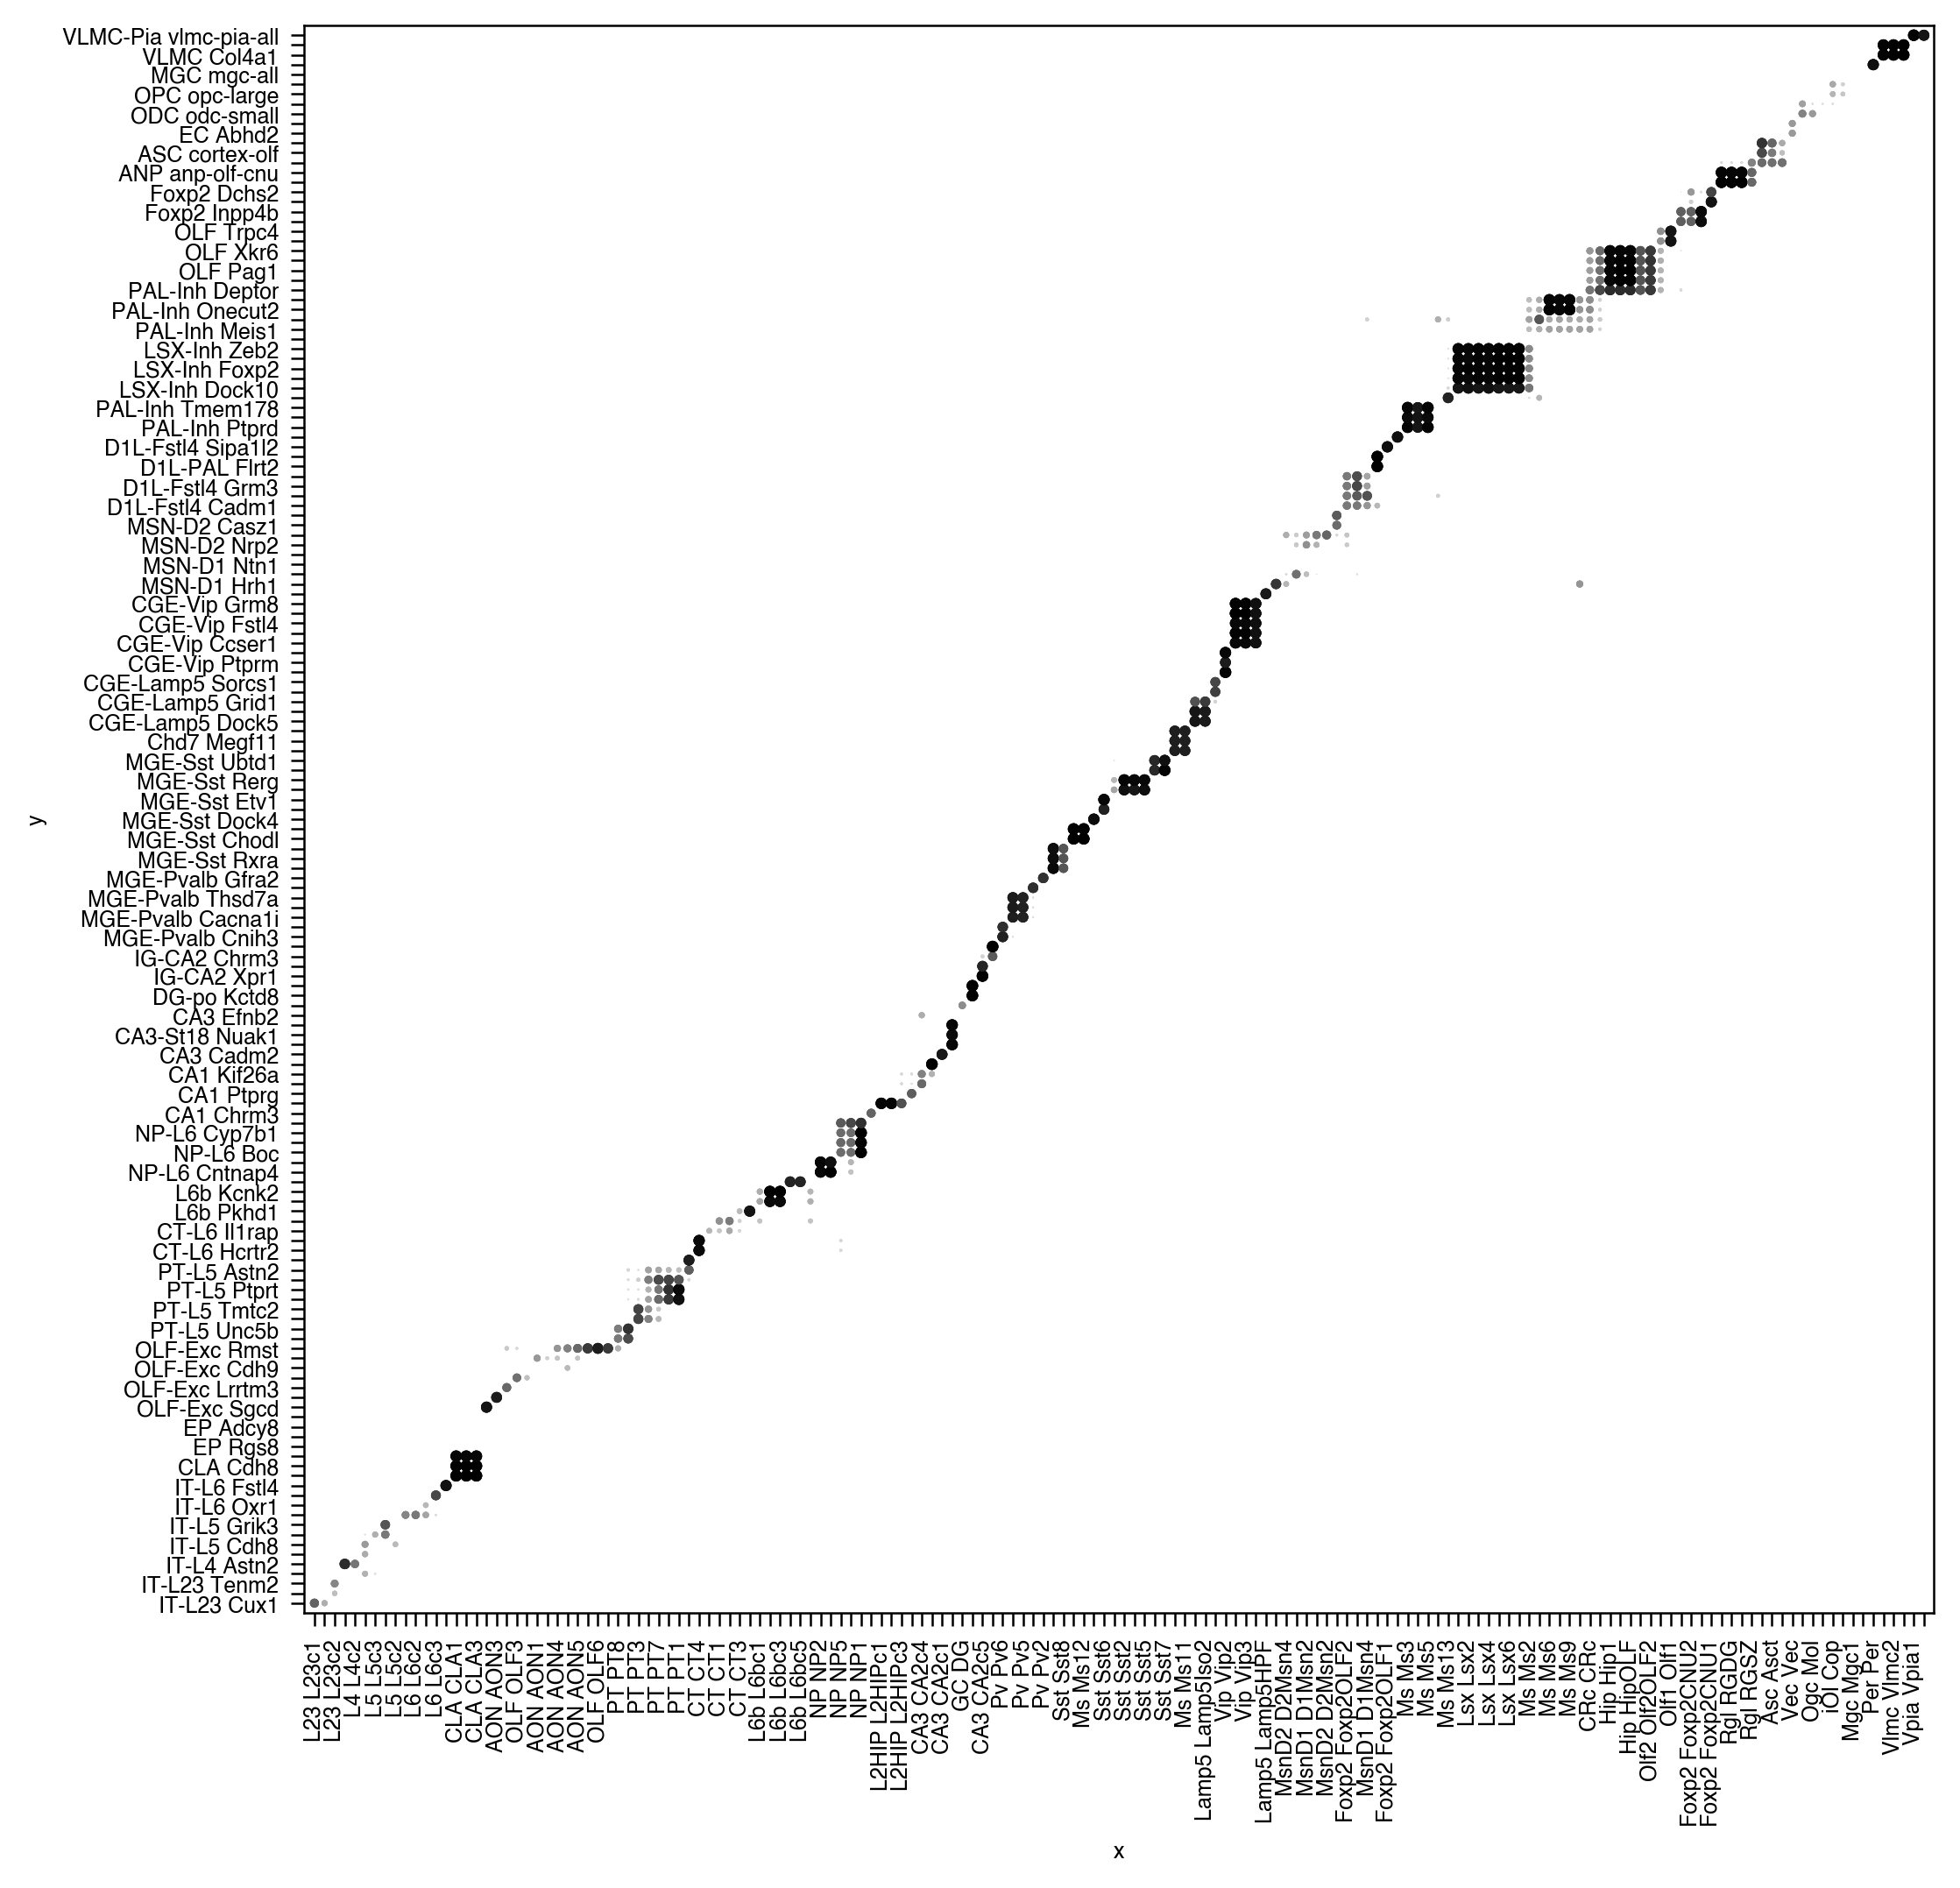

In [53]:
fig, ax = plt.subplots(figsize=(8, 8), dpi=300)
sns.scatterplot(ax=ax, data=total_cfm, x='x', y='y', 
                hue='OS', palette='Greys', legend=None,
                size='OS', sizes=(0, 10), size_norm=(0.2, 1),
                linewidth=0)

xlabels = [' '.join(i.split('.')[1:]) for i in atac_order]
xlabels = [t  if i % 2 == 0 else ''
           for i, t in enumerate(xlabels)]
ylabels = [t  if i % 2 == 0 else ''
           for i, t in enumerate(mc_order)]

ax.set(xticks=range(len(atac_order)), xticklabels=xlabels,
       yticks=range(len(mc_order)), yticklabels=ylabels,
       xlim=(-1, len(atac_order)), ylim=(-1, len(mc_order)))
ax.xaxis.set_tick_params(rotation=90)
fig.savefig('TotalCFM.odds_label.pdf')

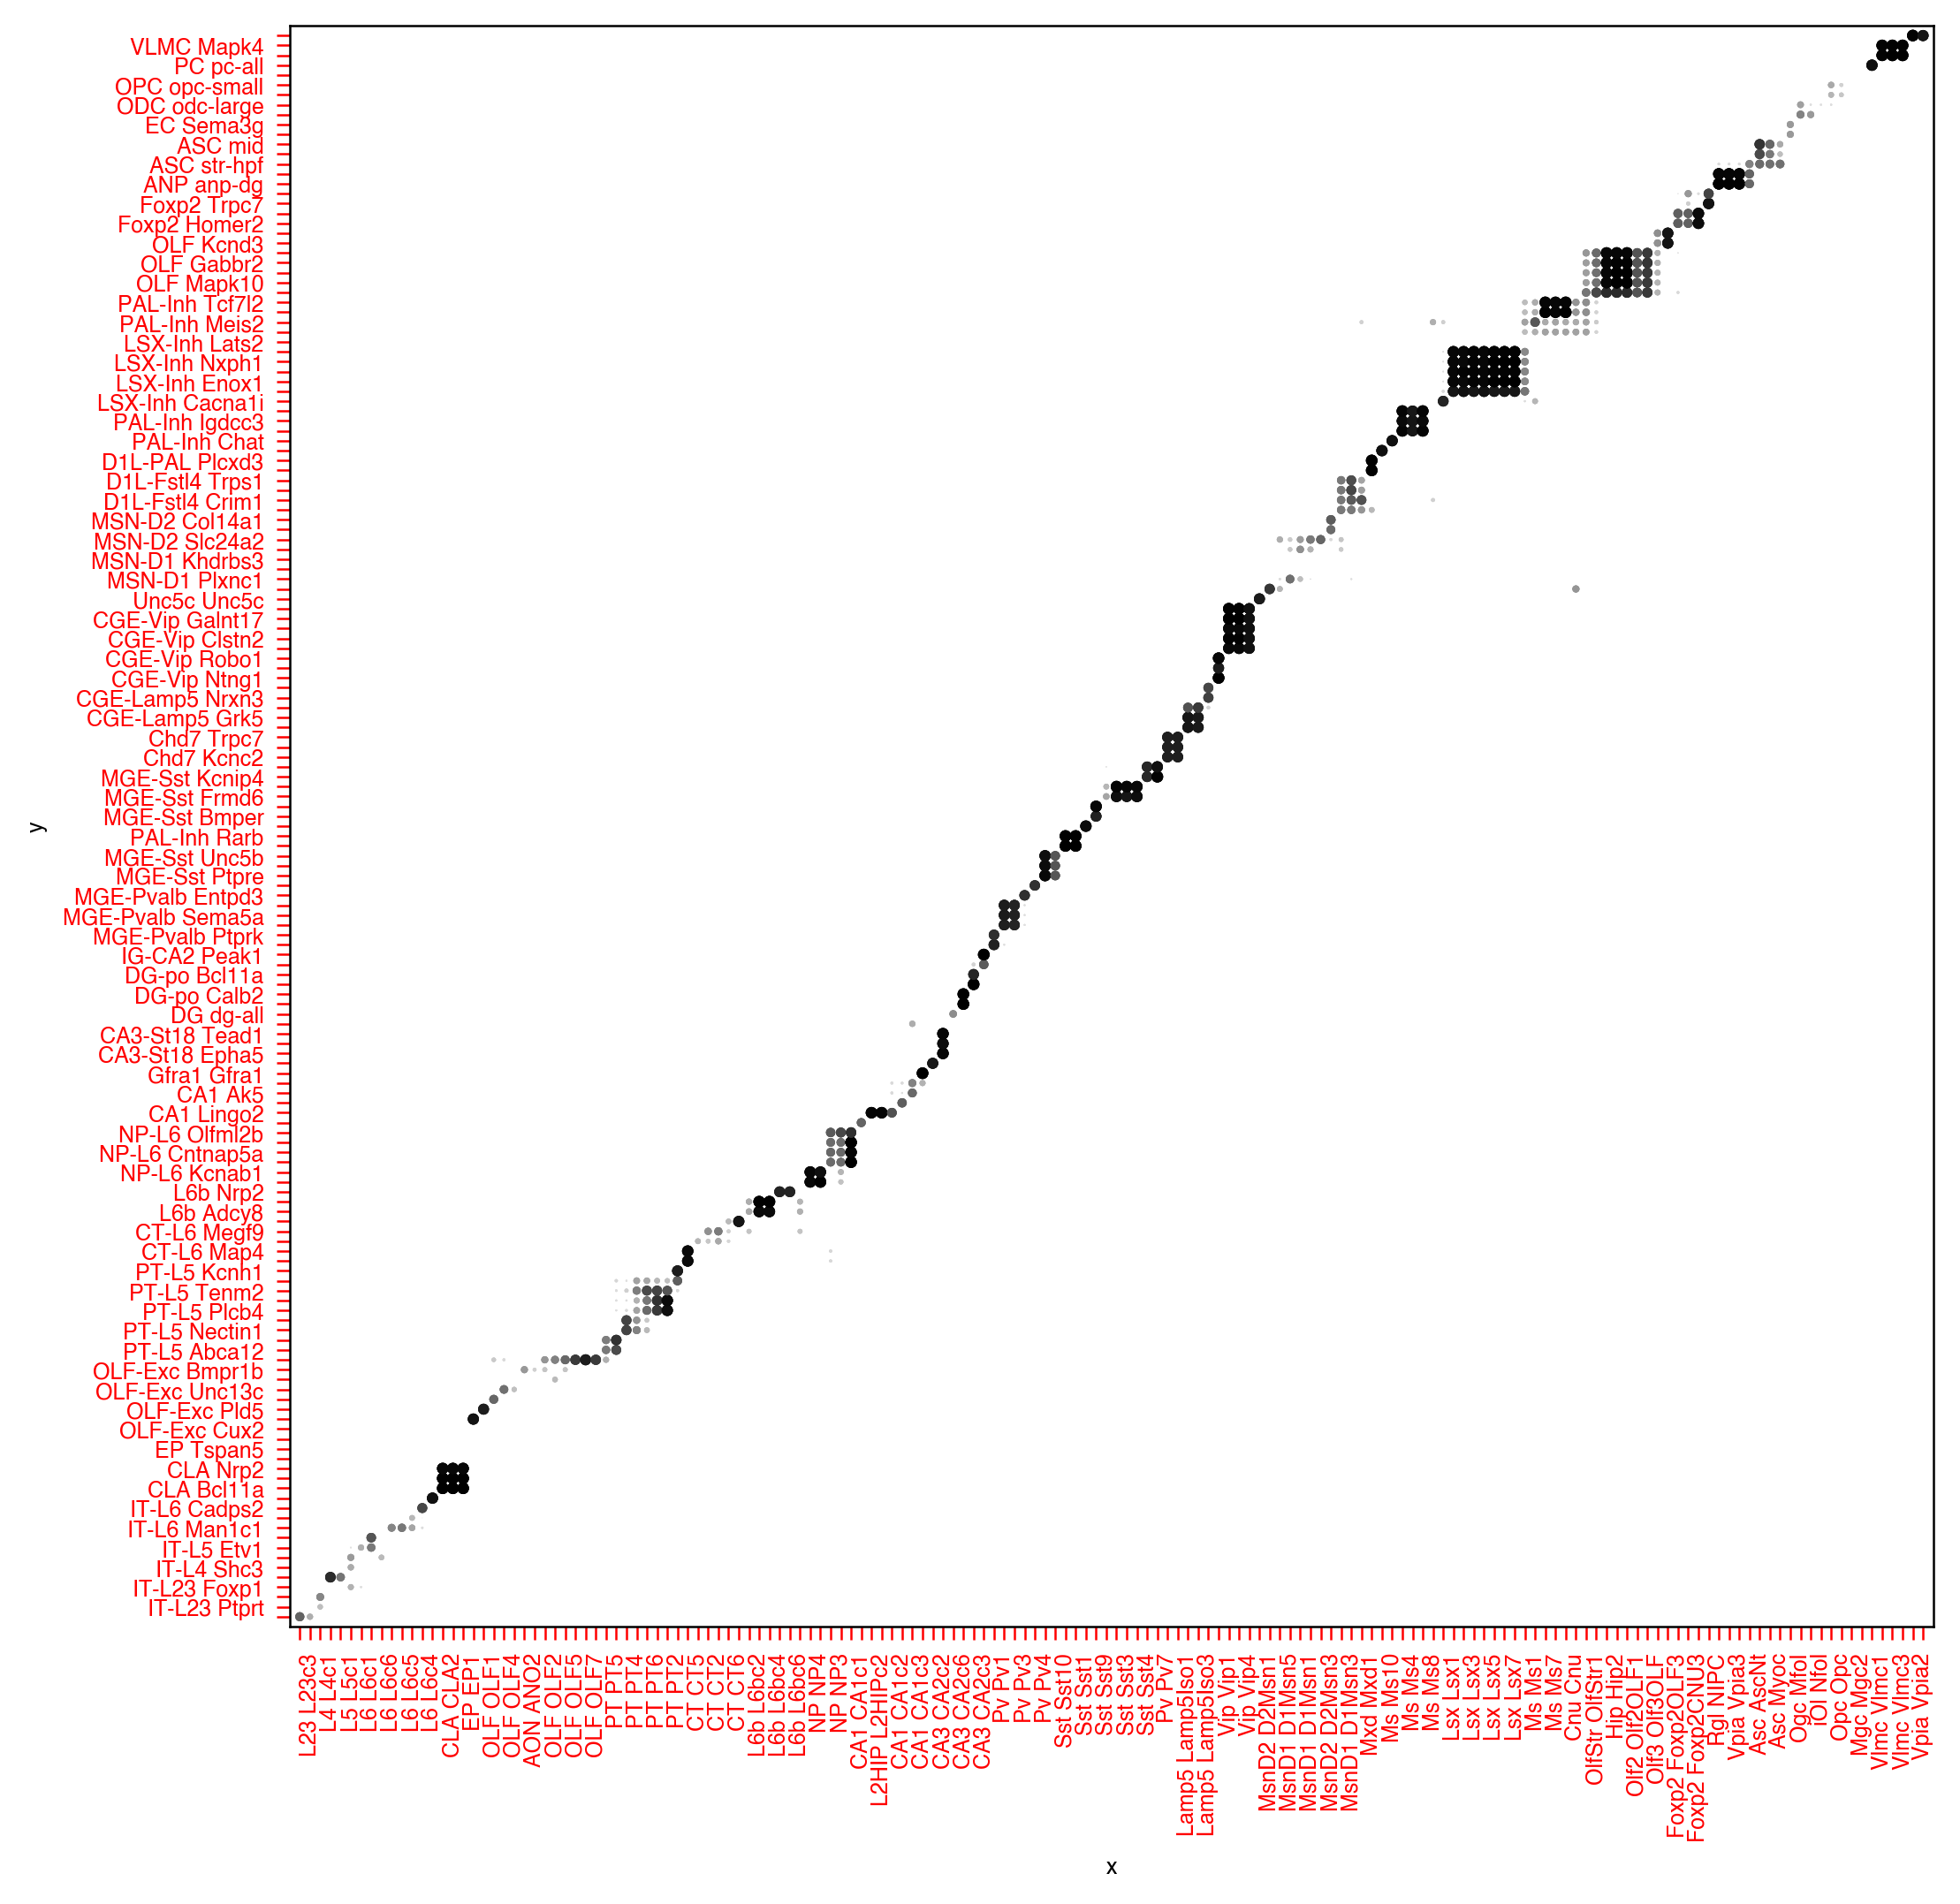

In [54]:
fig, ax = plt.subplots(figsize=(8, 8), dpi=300)
sns.scatterplot(ax=ax, data=total_cfm, x='x', y='y', 
                hue='OS', palette='Greys', legend=None,
                size='OS', sizes=(0, 10), size_norm=(0.2, 1),
                linewidth=0)

xlabels = [' '.join(i.split('.')[1:]) for i in atac_order]
xlabels = [t  if i % 2 != 0 else ''
           for i, t in enumerate(xlabels)]
ylabels = [t  if i % 2 != 0 else ''
           for i, t in enumerate(mc_order)]

ax.set(xticks=range(len(atac_order)), xticklabels=xlabels,
       yticks=range(len(mc_order)), yticklabels=ylabels,
       xlim=(-1, len(atac_order)), ylim=(-1, len(mc_order)))

ax.xaxis.set_tick_params(rotation=90, color='red', labelcolor='red')
ax.yaxis.set_tick_params(color='red', labelcolor='red')

fig.savefig('TotalCFM.even_label.pdf')

In [13]:
total_cfm.to_csv('TotalConfusion.withATAC.csv')

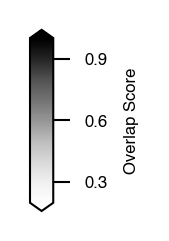

In [10]:
fig, cax = plt.subplots(figsize=(0.1, 0.8), dpi=300)
plot_colorbar(
    cax,
    cmap='Greys',
    hue_norm=(0.2, 1),
    cnorm=None,
    label='Overlap Score',
    orientation='vertical',
    labelsize=4,
    linewidth=0.5)
fig.savefig('ColorBar.pdf')